In [1]:
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


Data are aggregated from df_info (its city information is used to merge weather information - also rating might be used for model training), fsq_park_type, dynamic data include weather_info & df_curr_popularity. 

hour and day_of_week are extracted from datetime_hour.

### Current popularity data

In [5]:
# load current
# df_curr_popularity = pd.read_parquet('curr_popularity_Date_2021-03-16_2021-04-20.parquet')
# df_weather = pd.read_parquet('weather_data_Date_2021-03-16_2021-04-20.parquet')

df_curr_popularity = pd.read_parquet('curr_popularity_Date_2021-03-16_2021-05-28.parquet')
df_weather = pd.read_parquet('weather_data_Date_2021-03-16_2021-05-28.parquet')


In [6]:
len(df_curr_popularity['id'].unique())

1949

In [7]:
df_curr_popularity.head()

,datetime_hour,id,curr_popularity,rating_n,request_id,avg_popularity
0,2021-04-07 01:00:00,ChIJ2R92Tl7Gx4kRO6G7NcWtNhk,34.0,1360.0,ChIJ2R92Tl7Gx4kRO6G7NcWtNhk,0.0
1,2021-04-07 01:00:00,ChIJ6RplJk13xokRN0DaW7aoDaA,46.0,441.0,ChIJ6RplJk13xokRN0DaW7aoDaA,0.0
2,2021-04-07 01:00:00,ChIJBf9gK23kx4kR7d1LnPPvyp8,1.0,593.0,ChIJBf9gK23kx4kR7d1LnPPvyp8,1.0
3,2021-04-07 01:00:00,ChIJKfnD4cK9x4kRHA-LRHfOQYs,23.0,1532.0,ChIJKfnD4cK9x4kRHA-LRHfOQYs,3.0
4,2021-04-07 01:00:00,ChIJOwA0J6YCuIkRaK-0pk4S95E,7.0,301.0,ChIJOwA0J6YCuIkRaK-0pk4S95E,0.0


In [8]:
df_weather.shape

(668736, 24)

### Get three info table
Philadelphia, state parks, and nyc

In [9]:
from utility import get_info, find_city_level_address

In [238]:
# import importlib
importlib.reload(utility)

<module 'utility' from '/Users/chengqiu/PycharmProjects/philly_outdoors/utility.py'>

In [10]:
info_to_concat = []
info_list = ['philly_parks_info.db', 'philly_state_parks_info.db', 'nyc_parks_info.db']
for info_db in info_list:
    df = get_info(info_db)
    info_to_concat.append(df)
    
info_df = pd.concat(info_to_concat, axis=0)

In [11]:
info_df.drop_duplicates(subset='id', inplace=True, ignore_index=True)
print(info_df.shape)
info_df.head()

(4601, 6)


,id,name,rating,lat,lng,address
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,4.7,38.937670,-76.500899,"600 Quiet Waters Park Rd, Annapolis, MD 21403,..."
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,5.0,38.927212,-76.494150,"101 W Bay View Dr, Annapolis, MD 21403, USA"
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,4.7,38.930202,-76.508341,"1701-1799 Quiet Waters Park Rd, Annapolis, MD ..."
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,4.8,38.931865,-76.505658,"600 Quiet Waters Park Rd, Annapolis, MD 21403,..."
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,4.5,38.963271,-76.505150,"273 Hilltop Ln, Annapolis, MD 21403, USA"


In [12]:
info_df['address_city'] = info_df['address'].apply(find_city_level_address)

Cannot find city-level address: Rothrock State Forest, Pennsylvania 16669, USA


In [13]:
info_df.head()

,id,name,rating,lat,lng,address,address_city
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,4.7,38.937670,-76.500899,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD"
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,5.0,38.927212,-76.494150,"101 W Bay View Dr, Annapolis, MD 21403, USA","Annapolis,MD"
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,4.7,38.930202,-76.508341,"1701-1799 Quiet Waters Park Rd, Annapolis, MD ...","Annapolis,MD"
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,4.8,38.931865,-76.505658,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD"
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,4.5,38.963271,-76.505150,"273 Hilltop Ln, Annapolis, MD 21403, USA","Annapolis,MD"


### FourSquare park type

In [14]:
park_type_df = pd.concat([pd.read_parquet('philly_park_foursquare_types.parquet'), 
                          pd.read_parquet('nyc_park_foursquare_types.parquet')], axis=0)


In [15]:
print(park_type_df.shape)
park_type_df.head()

(4473, 8)


,id,name,lat,lng,fsq_name,fsq_type_name,fsq_type_id,fsq_type_name_simplified
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,38.937670,-76.500899,Quiet Waters Park,Park,4bf58dd8d48988d163941735,Park
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,38.927212,-76.494150,Hillsmere Shores Beach and Playground,Playground,4bf58dd8d48988d1e7941735,Playground
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,38.930202,-76.508341,,,,None
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,38.931865,-76.505658,Quiet Waters Dog Park,Dog Run,4bf58dd8d48988d1e5941735,Dog Run
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,38.963271,-76.505150,"""Pip"" Moyer Recreation Center",Gym,4bf58dd8d48988d176941735,Athletics & Sports


In [84]:
park_type_df['fsq_type_name_simplified'].unique()

array(['Park', 'Playground', None, 'Dog Run', 'Athletics & Sports',
       'Other Great Outdoors', 'Harbor / Marina', 'Plaza',
       'Arts & Entertainment', 'State / Provincial Park', 'Campground',
       'River', 'Travel & Transport', 'Shop & Service', 'Trail',
       'Scenic Lookout', 'Professional & Other Places', 'Bike Trail',
       'Nature Preserve', 'Outdoors & Recreation', 'Beach', 'Field',
       'Lake', 'Fishing Spot', 'Pool', 'Farm', 'Bridge',
       'Botanical Garden', 'College & University', 'Nightlife Spot',
       'Cemetery', 'Food', 'Vineyard', 'National Park',
       'Recreation Center', 'Garden', 'Sculpture Garden', 'Ski Area',
       'Island', 'Pedestrian Plaza', 'Forest', 'Waterfall', 'Picnic Area',
       'Roof Deck', 'Waterfront'], dtype=object)

In [16]:
# add fsq_type to info_df
info_df_wt_fsq_type = info_df.merge(park_type_df[['id', 'fsq_type_name_simplified']], how='left', on='id')
print(info_df_wt_fsq_type.shape)
info_df_wt_fsq_type.head()

(4601, 8)


,id,name,rating,lat,lng,address,address_city,fsq_type_name_simplified
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,4.7,38.937670,-76.500899,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD",Park
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,5.0,38.927212,-76.494150,"101 W Bay View Dr, Annapolis, MD 21403, USA","Annapolis,MD",Playground
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,4.7,38.930202,-76.508341,"1701-1799 Quiet Waters Park Rd, Annapolis, MD ...","Annapolis,MD",None
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,4.8,38.931865,-76.505658,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD",Dog Run
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,4.5,38.963271,-76.505150,"273 Hilltop Ln, Annapolis, MD 21403, USA","Annapolis,MD",Athletics & Sports


In [17]:
# add state parks to info_df_wt_fsq_type (only when fsq_type_name_simplified is none)
philly_state_park_id = get_info('philly_state_parks_info.db')['id']

park_id_missing_fsq_type = info_df_wt_fsq_type[info_df_wt_fsq_type['fsq_type_name_simplified'].isna()]['id']
state_park_id = set(park_id_missing_fsq_type).intersection(set(philly_state_park_id))

info_df_wt_fsq_type.set_index('id', inplace=True)
info_df_wt_fsq_type.loc[state_park_id, ['fsq_type_name_simplified']] = 'State / Provincial Park'

In [18]:
info_df_wt_fsq_type.shape

(4601, 7)

In [19]:
# # fill in the rest with 'Park' - opt out, now use SimpleImputer to create a new "missing_value" category 
info_df_wt_fsq_type = info_df_wt_fsq_type.reset_index()
# info_df_wt_fsq_type.loc[np.where(info_df_wt_fsq_type['fsq_type_name_simplified'].isna())[0], 
#                         ['fsq_type_name_simplified']] = 'Park'

In [20]:
info_df_wt_fsq_type.head()

,id,name,rating,lat,lng,address,address_city,fsq_type_name_simplified
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,4.7,38.937670,-76.500899,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD",Park
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,5.0,38.927212,-76.494150,"101 W Bay View Dr, Annapolis, MD 21403, USA","Annapolis,MD",Playground
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,4.7,38.930202,-76.508341,"1701-1799 Quiet Waters Park Rd, Annapolis, MD ...","Annapolis,MD",None
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,4.8,38.931865,-76.505658,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD",Dog Run
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,4.5,38.963271,-76.505150,"273 Hilltop Ln, Annapolis, MD 21403, USA","Annapolis,MD",Athletics & Sports


In [21]:
info_df_wt_fsq_type[info_df_wt_fsq_type['id'] == 'ChIJ2R92Tl7Gx4kRO6G7NcWtNhk']

,id,name,rating,lat,lng,address,address_city,fsq_type_name_simplified
252,ChIJ2R92Tl7Gx4kRO6G7NcWtNhk,Susquehanna State Park,4.7,39.604816,-76.15167,"4188 Wilkinson Rd, Havre De Grace, MD 21078, USA","Havre De Grace,MD",None


In [90]:
Counter(info_df_wt_fsq_type['fsq_type_name_simplified']); 

In [432]:
info_df_wt_fsq_type[info_df_wt_fsq_type['fsq_type_name_simplified']=='Travel & Transport'].head()

,id,name,lat,lng,address,address_city,fsq_type_name_simplified
35,ChIJU-taUeGcyIkRmOMiqeRIRks,Columbia Crossing River Trails Center,40.030361,-76.507988,"41 Walnut St, Columbia, PA 17512, USA","Columbia,PA",Travel & Transport
437,ChIJP7LWOW_TxYkRyQ-J7WbddUs,Bowers Park,40.485966,-75.743690,"Mertztown, PA 19539, USA","Mertztown,PA",Travel & Transport
678,ChIJhQi4JJGRxokRpVHYWzwCpOM,Lock 60 Recreation Area,40.144674,-75.508518,"Locktender's House, 400 Tow Path Rd, Mont Clar...","Mont Clare,PA",Travel & Transport
1151,ChIJreKNFonIxokRPfXi7jRKom0,Cherry Street Pier,39.952446,-75.138918,"121 N Christopher Columbus Blvd, Philadelphia,...","Philadelphia,PA",Travel & Transport
1801,ChIJW8juxou6w4kR5ESMsW9EEjQ,Connell Corporate Park,40.664624,-74.414364,"Plainfield Ave, Berkeley Heights, NJ 07922, USA","Berkeley Heights,NJ",Travel & Transport


## Include fsq_type and address_city to df_curr_popularity

In [22]:
df_curr_popularity = df_curr_popularity.merge(info_df_wt_fsq_type[['id', 'address_city', 'fsq_type_name_simplified', 
                                                                   'rating']], how='left', on='id')

In [437]:
#Travel & Transport
df_curr_popularity[df_curr_popularity['fsq_type_name_simplified']=='Playground']['id'].unique();

## Merge curr_popularity and weather tabel
The main dataframe is merged from curr_popularity and weather_info table (by city and datetime)

In [108]:
df_curr_popularity.columns

Index(['datetime_hour', 'id', 'curr_popularity', 'rating_n', 'request_id',
       'avg_popularity', 'address_city', 'fsq_type_name_simplified', 'rating'],
      dtype='object')

In [24]:
df_popularity = df_curr_popularity.merge(df_weather, how='left', left_on=['address_city', 'datetime_hour'], 
                         right_on=['location', 'datetime'])

In [25]:
df_popularity['hour'] = df_popularity['datetime_hour'].apply(lambda x:x.hour) # extract hour & dayofweek from datetime_hour
df_popularity['dayofweek'] = df_popularity['datetime_hour'].apply(lambda x:x.dayofweek)

In [183]:
# df_popularity.to_parquet('data_v1_Date_2021-03-16_2021-04-10.parquet')
# df_popularity.to_parquet('data_v1_Date_2021-03-16_2021-04-20.parquet')
# df_popularity.to_parquet('data_v1_Date_2021-03-16_2021-05-28.parquet')

# df_popularity = pd.read_parquet('data_v1_Date_2021-03-16_2021-04-20.parquet')
df_popularity = pd.read_parquet('data_v1_Date_2021-03-16_2021-05-28.parquet')


In [165]:
df_popularity.shape

(507886, 35)

In [166]:
df_popularity.columns

Index(['datetime_hour', 'id', 'curr_popularity', 'rating_n', 'request_id',
       'avg_popularity', 'address_city', 'fsq_type_name_simplified', 'rating',
       'datetimeEpoch', 'temp', 'feelslike', 'humidity', 'dew', 'precip',
       'precipprob', 'snow', 'snowdepth', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'pressure', 'visibility', 'cloudcover',
       'solarradiation', 'solarenergy', 'uvindex', 'conditions', 'datetime',
       'location', 'latitude', 'longitude', 'hour', 'dayofweek'],
      dtype='object')

In [28]:
# the ones without temp but with address_city
df_popularity.loc[df_popularity['temp'].isna() & ~df_popularity['address_city'].isna(), 
                  ['address_city', 'location', 'datetime', 'datetime_hour']]


,address_city,location,datetime,datetime_hour
4458,"Jarrettsville,MD",NaN,NaT,2021-04-19 00:00:00
4471,"Flourtown,PA",NaN,NaT,2021-04-19 00:00:00
4475,"Jamison,PA",NaN,NaT,2021-04-19 00:00:00
4482,"Upland,PA",NaN,NaT,2021-04-19 00:00:00
4485,"Wallingford,PA",NaN,NaT,2021-04-19 00:00:00
...,...,...,...,...
1417347,"Cape May,NJ",NaN,NaT,2021-05-19 01:00:00
1417356,"Coudersport,PA",NaN,NaT,2021-05-19 01:00:00
1417370,"Aberdeen,MD",NaN,NaT,2021-05-19 01:00:00
1417371,"Renovo,PA",NaN,NaT,2021-05-19 01:00:00


In [29]:
df_popularity.loc[df_popularity['temp'].isna() & (df_popularity['address_city'] == 'Paterson,NJ')]

,datetime_hour,id,curr_popularity,rating_n,request_id,avg_popularity,address_city,fsq_type_name_simplified,rating,datetimeEpoch,...,solarradiation,solarenergy,uvindex,conditions,datetime,location,latitude,longitude,hour,dayofweek
110693,2021-05-27 00:00:00,ChIJrRH02TD8wokRFyp-V-dfEPU,23.0,196.0,ChIJrRH02TD8wokRFyp-V-dfEPU,1.0,"Paterson,NJ",Park,3.7,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0,3
110837,2021-05-27 01:00:00,ChIJS4XXJM_9wokRi4GvZ-DecfM,13.0,561.0,ChIJS4XXJM_9wokRi4GvZ-DecfM,1.0,"Paterson,NJ",None,4.6,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1,3
110901,2021-05-27 01:00:00,ChIJdTSF-9z9wokRj0-PHUdG8WE,12.0,625.0,ChIJdTSF-9z9wokRj0-PHUdG8WE,1.0,"Paterson,NJ",Park,4.2,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1,3
110964,2021-05-27 01:00:00,ChIJrRH02TD8wokRFyp-V-dfEPU,100.0,196.0,ChIJrRH02TD8wokRFyp-V-dfEPU,1.0,"Paterson,NJ",Park,3.7,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1,3
111058,2021-05-27 02:00:00,ChIJS4XXJM_9wokRi4GvZ-DecfM,31.0,561.0,ChIJS4XXJM_9wokRi4GvZ-DecfM,1.0,"Paterson,NJ",None,4.6,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836816,2021-06-01 12:00:00,ChIJG-vyNc_9wokRZ9ntKcnS1tc,32.5,6129.5,ChIJG-vyNc_9wokRZ9ntKcnS1tc,28.0,"Paterson,NJ",National Park,4.5,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,1
837006,2021-06-01 12:00:00,ChIJS4XXJM_9wokRi4GvZ-DecfM,23.0,562.0,ChIJS4XXJM_9wokRi4GvZ-DecfM,13.0,"Paterson,NJ",None,4.6,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,1
837188,2021-06-01 12:00:00,ChIJdTSF-9z9wokRj0-PHUdG8WE,25.5,626.0,ChIJdTSF-9z9wokRj0-PHUdG8WE,20.0,"Paterson,NJ",Park,4.2,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,1
837335,2021-06-01 12:00:00,ChIJm2pZQsP9wokRvqbU-uglNCY,16.0,271.0,ChIJm2pZQsP9wokRvqbU-uglNCY,24.0,"Paterson,NJ",Athletics & Sports,4.0,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,12,1


In [127]:
no_weather_cities = df_popularity.loc[
    df_popularity['temp'].isna() & ~df_popularity['address_city'].isna(), 'address_city'].unique().tolist()

all_weather_cities = df_weather['location'].unique().tolist()

# city not queried for weather
cities_with_no_weather = set(no_weather_cities) - set(all_weather_cities)

In [137]:
len(set(no_weather_cities) & set(all_weather_cities))

174

In [7]:
len(df_popularity['id'].unique())

1287

In [234]:
city_address = sorted(list(cities_with_no_weather))[0]
print(city_address)
df_popularity[df_popularity['address_city'] == city_address]#['id'].unique()
# summary of cases:
# https://docs.google.com/spreadsheets/d/1pYvh83GEh9OoXm04vl3sstvis7wrDN7Q3FW3_MHK2JA/edit#gid=0

Aberdeen,MD


,datetime_hour,id,curr_popularity,rating_n,request_id,address_city,fsq_type_name_simplified,datetimeEpoch,temp,feelslike,...,visibility,cloudcover,solarradiation,solarenergy,uvindex,conditions,datetime,location,latitude,longitude
73992,2021-04-10 20:00:00,ChIJdX36VZrBx4kR9kEZqQJiHBY,82.0,300.0,ChIJdX36VZrBx4kR9kEZqQJiHBY,"Aberdeen,MD",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
74215,2021-04-10 21:00:00,ChIJdX36VZrBx4kR9kEZqQJiHBY,46.0,300.0,ChIJdX36VZrBx4kR9kEZqQJiHBY,"Aberdeen,MD",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
74392,2021-04-10 22:00:00,ChIJdX36VZrBx4kR9kEZqQJiHBY,22.0,300.0,ChIJdX36VZrBx4kR9kEZqQJiHBY,"Aberdeen,MD",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
74644,2021-04-11 00:00:00,ChIJdX36VZrBx4kR9kEZqQJiHBY,34.0,300.0,ChIJdX36VZrBx4kR9kEZqQJiHBY,"Aberdeen,MD",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
74734,2021-04-11 01:00:00,ChIJdX36VZrBx4kR9kEZqQJiHBY,131.0,300.0,ChIJdX36VZrBx4kR9kEZqQJiHBY,"Aberdeen,MD",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
74806,2021-04-11 02:00:00,ChIJdX36VZrBx4kR9kEZqQJiHBY,131.0,300.0,ChIJdX36VZrBx4kR9kEZqQJiHBY,"Aberdeen,MD",Park,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


(0, 500)

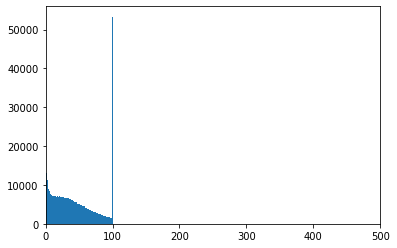

In [92]:
import datetime

plt.hist(df_popularity[df_popularity['datetime_hour']>datetime.datetime(2021, 5, 6)]['curr_popularity'], 100);
plt.xlim([0, 500])
# so it looks like that there is a phase shift of google live data - after 04202021, more data were capped at 100...
# especially after 0505, almost all are capped below 100...

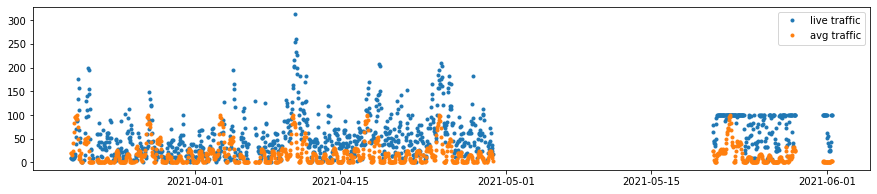

In [119]:
test_id = 'ChIJPUAh3FWRzokRTusj8NUp8dk'
#ChIJlT2okERFwokR616KLhTmZ8I; ChIJ2R92Tl7Gx4kRO6G7NcWtNhk; ChIJPUAh3FWRzokRTusj8NUp8dk
tmp = df_popularity[(df_popularity['datetime_hour']>datetime.datetime(2021, 3, 20)) & (
    df_popularity['id'] == test_id)]
plt.figure(figsize=[15,3])
plt.plot(tmp['datetime_hour'], tmp['curr_popularity'], '.', label='live traffic')
plt.plot(tmp['datetime_hour'], tmp['avg_popularity'], '.', label='avg traffic')
plt.legend()

In [185]:
# given the change in data property, mask out data after 0505; also remove curr_popularity that is larger than 600
# note that a seperate model can be trained with data after 0505 where all are capped between 0-100
df_popularity_train = df_popularity[(df_popularity['curr_popularity']<=600) & (
    df_popularity['datetime_hour']<datetime.datetime(2021, 5, 5))]

df_popularity = df_popularity_train.copy()

In [133]:
# df_popularity.to_parquet('data_v2_Date_2021-03-16_2021-05-05.parquet')
df_popularity = pd.read_parquet('data_v2_Date_2021-03-16_2021-05-05.parquet')

## Data visualization

In [130]:
from ipywidgets import widgets
import matplotlib.pyplot as plt

X = df_popularity.drop(columns=['curr_popularity', ])
y = df_popularity['curr_popularity']

def data_plot(X, y):
    def plotter(column):
        valid_rows = X[column].notna()
        plt.plot(X.loc[valid_rows, column], y[valid_rows], '.', color='k', alpha=0.01)
        plt.xticks(rotation = 90)
        plt.xlabel(column)
        plt.ylabel('Current popularity')
    
    return plotter

dropdown_values = df_popularity.columns #{"{0}: {1}".format(k, features_dict[k]):k for k in X.columns}
widgets.interact(data_plot(X, y), column=dropdown_values);

interactive(children=(Dropdown(description='column', options=('datetime_hour', 'id', 'curr_popularity', 'ratin…

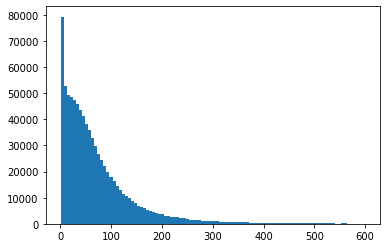

In [132]:
plt.hist(df_popularity['curr_popularity'], 100); 

In [131]:
df_popularity[df_popularity['curr_popularity']>2000]

,datetime_hour,id,curr_popularity,rating_n,request_id,avg_popularity,address_city,fsq_type_name_simplified,rating,datetimeEpoch,...,solarradiation,solarenergy,uvindex,conditions,datetime,location,latitude,longitude,hour,dayofweek


# Regression models

In [251]:
from collections import Counter
Counter(df_popularity['fsq_type_name_simplified']); 

In [121]:
df_popularity.shape

(1417403, 35)

In [129]:
df_popularity.columns

Index(['datetime_hour', 'id', 'curr_popularity', 'rating_n', 'request_id',
       'avg_popularity', 'address_city', 'fsq_type_name_simplified',
       'datetimeEpoch', 'temp', 'feelslike', 'humidity', 'dew', 'precip',
       'precipprob', 'snow', 'snowdepth', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'pressure', 'visibility', 'cloudcover',
       'solarradiation', 'solarenergy', 'uvindex', 'conditions', 'datetime',
       'location', 'latitude', 'longitude', 'hour', 'dayofweek'],
      dtype='object')

### How much weather can predict popularity

In [103]:
from sklearn.linear_model import LinearRegression 

In [272]:
sub_df = df_popularity[['feelslike', 'humidity','windspeed', 'curr_popularity', 'solarradiation']]
sub_df.dropna(axis=0, inplace=True)

X = sub_df[['feelslike', 'humidity', 'windspeed', 'solarradiation']]
y = sub_df['curr_popularity']


/Users/chengqiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [274]:
lr = LinearRegression()  # make an instance of the model 
lr.fit(X, y)  
lr.score(X, y)

0.16646606493383653

In [277]:
sub_df.shape

(236360, 5)

### Consider hour and day_of_week

In [198]:
df_popularity['datetime_hour'][0].dayofweek

2

In [116]:
df_hour = pd.get_dummies(df_popularity['hour'], prefix='hour')
df_dayweek = pd.get_dummies(df_popularity['dayofweek'], prefix='dayofweek')

df_type = pd.get_dummies(df_popularity['fsq_type_name_simplified'])

In [117]:
# sub_df = pd.concat([df_hour, df_dayweek, df_popularity[['temp','humidity', 'precip', 'curr_popularity']]], axis=1)
sub_df = pd.concat([df_hour, df_dayweek, df_type, df_popularity[['avg_popularity', 'curr_popularity']]], axis=1)

sub_df.dropna(axis=0, inplace=True)
sub_df.shape

(507886, 71)

In [109]:
df_X = sub_df.drop(columns=['curr_popularity',])
df_y = sub_df['curr_popularity']

In [119]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline

popularity_est = Pipeline([('standard_scaler', MinMaxScaler((-1,1))),
                    ('polynomial_trans', PolynomialFeatures(2)),
                    ('lr', Ridge(alpha=20))])
#Lasso(alpha=2)

popularity_est.fit(df_X, df_y)
popularity_est.score(df_X, df_y)

0.22079537295738916

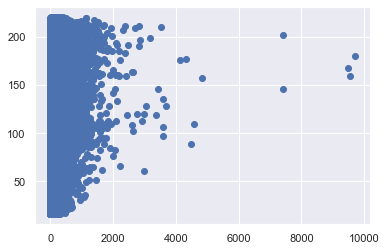

In [189]:
sns.set()
plt.plot(df_y, popularity_est.predict(df_X), 'o'); 

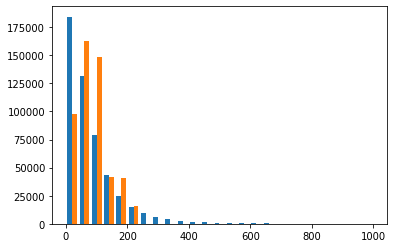

In [112]:
plt.hist([df_y[df_y<1000], popularity_est.predict(df_X)[df_y<1000]], 25); 

In [358]:
# popularity_est[-1].sparse_coef_
# popularity_est[-1].coef_

In [113]:
df_X.columns

Index(['hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'dayofweek_0',
       'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'avg_popularity'],
      dtype='object')

#### Cross validation

In [377]:
popularity_est.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standard_scaler', 'polynomial_trans', 'lr', 'standard_scaler__copy', 'standard_scaler__feature_range', 'polynomial_trans__degree', 'polynomial_trans__include_bias', 'polynomial_trans__interaction_only', 'polynomial_trans__order', 'lr__alpha', 'lr__copy_X', 'lr__fit_intercept', 'lr__max_iter', 'lr__normalize', 'lr__random_state', 'lr__solver', 'lr__tol'])

In [154]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    popularity_est,
    {"lr__alpha": np.logspace(0, 3, 5)},  # range of hyperparameters to test
    cv=10,  # 10-fold cross validation
    n_jobs=2,  # run each hyperparameter in one of two parallel jobs
)
gs.fit(df_X, df_y)

In [369]:
gs.score(df_X, df_y)

0.37397731985016536

In [373]:
print(gs.best_params_)
print(gs.best_score_)

{'lr__alpha': 177.82794100389228}
0.30114205500362573


### Use Pipeline to organize the model
Start from the dataframe df_popularity, you'd like to use features related to time and weather to predict the curr_popularity. 

categorical features: `hour`, `dayofweek`, `fsq_type`
numerical features: `temp`, `humidity`, `precip`, (date can be added later on)

All features should be first transformed accordingly, pass with polynomial preprocessing (interaction), scaling, and then regressor. 

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance


In [169]:
df_popularity['datetime_hour'][0]

Timestamp('2021-04-07 01:00:00')

In [115]:
# since the weather data were not complete - only model data before 2021-04-10 for now
# df_popularity = df_popularity[df_popularity['datetime_hour']<'2021-04-21 01:00:00']

In [136]:
df_popularity.shape

(842866, 35)

In [191]:
df_popularity['curr_popularity'].describe()

count    842866.000000
mean         71.716181
std          74.580956
min           1.000000
25%          22.000000
50%          51.000000
75%          94.500000
max         600.000000
Name: curr_popularity, dtype: float64

In [133]:
# TODO: do something to clear up noise in curr_popularity as well?
# df_popularity = df_popularity[df_popularity['curr_popularity']<1000]

In [138]:
print(df_popularity.shape)
df_popularity.columns

(842866, 35)


Index(['datetime_hour', 'id', 'curr_popularity', 'rating_n', 'request_id',
       'avg_popularity', 'address_city', 'fsq_type_name_simplified', 'rating',
       'datetimeEpoch', 'temp', 'feelslike', 'humidity', 'dew', 'precip',
       'precipprob', 'snow', 'snowdepth', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'pressure', 'visibility', 'cloudcover',
       'solarradiation', 'solarenergy', 'uvindex', 'conditions', 'datetime',
       'location', 'latitude', 'longitude', 'hour', 'dayofweek'],
      dtype='object')

In [186]:
df_popularity_y = df_popularity['curr_popularity']
all_feature_columns = ['id', 'avg_popularity', 'fsq_type_name_simplified', 
                       'temp', 'feelslike', 'humidity', 'dew', 'precip', 'windspeed', 
                       'pressure', 'visibility', 'cloudcover', 'solarradiation', 'solarenergy', 'uvindex', 
                       'conditions', 'rating',
                       'hour', 'dayofweek']
df_popularity_X = df_popularity[all_feature_columns]

X_train, X_test, y_train, y_test = train_test_split(
    df_popularity_X, df_popularity_y, random_state=42)

In [140]:
# feature collinearity:
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py

from scipy.stats import spearmanr
from scipy.cluster import hierarchy

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# corr = spearmanr(df_popularity_X).correlation
# corr_linkage = hierarchy.ward(corr)
# dendro = hierarchy.dendrogram(
#     corr_linkage, labels=all_feature_columns, ax=ax1, leaf_rotation=90
# )
# dendro_idx = np.arange(0, len(dendro['ivl']))

# ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
# ax2.set_xticks(dendro_idx)
# ax2.set_yticks(dendro_idx)
# ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
# ax2.set_yticklabels(dendro['ivl'])
# fig.tight_layout()
# plt.show()

In [188]:
X_train[X_train['conditions'].isna()]['conditions'].unique()

array([None], dtype=object)

In [192]:
categorical_columns = ['hour', 'dayofweek', 'conditions', 'fsq_type_name_simplified']
# numerical_columns = ['avg_popularity', 'temp', 'humidity', 'dew', 'precip', 'windspeed', 
#                      'pressure', 'visibility', 'cloudcover', 'rating']
numerical_columns = ['avg_popularity', 'temp', 'humidity', 'dew', 'precip', 'windspeed', 'cloudcover', 'rating']

# preprocessing for numerical and categorical features
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values=None, strategy='constant')),#strategy='most_frequent'; 'constant' for string type will be imputed with 'missing_value'
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))
])
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaling', MaxAbsScaler())
])

# apply preprocessing to each column [TODO: but then you couldn't do Polynomial within 'num'??]
features = ColumnTransformer(
    [('cat', categorical_pipe, categorical_columns),
     ('num', numerical_pipe, numerical_columns)])

est = Pipeline([
    ('feature', features),
    ('estimator', RandomForestRegressor(n_estimators=20, max_depth=20, min_samples_leaf=10))
])
est.fit(X_train, y_train)

print(f'R^2 score using selected columns and transformers (train): {est.score(X_train, y_train)}')
print(f'R^2 score using selected columns and transformers (test): {est.score(X_test, y_test)}')

R^2 score using selected columns and transformers (train): 0.5178795436517758
R^2 score using selected columns and transformers (test): 0.4061271539554714


In [193]:
import dill 

# with open('estimator_v1_Date_2021-03-16_2021-04-20.dill', 'wb') as f:
#     dill.dump(est, f)
# with open('estimator_v2_Date_2021-03-16_2021-05-05.dill', 'wb') as f:
#     dill.dump(est, f)
    
# with open('estimator_v1_Date_2021-03-16_2021-04-20.dill', 'rb') as f:
#     est = dill.load(f)    

(-500, 700)

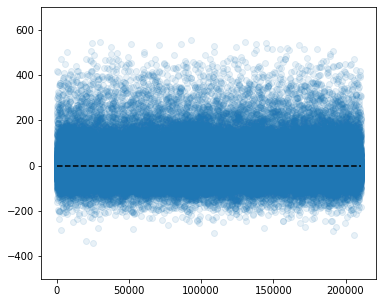

In [194]:
plt.figure(figsize=[6,5])
plt.plot(np.arange(len(y_test)), y_test - est.predict(X_test), 'o', alpha=0.1); 
plt.plot([0, len(y_test)], [0, 0], 'k--')
# plt.axis('equal'); plt.xlim([0, 300]); 
plt.ylim([-500, 700])

#### Feature importance

Text(0.5, 1.0, 'Random Forest Feature Importances (MDI)')

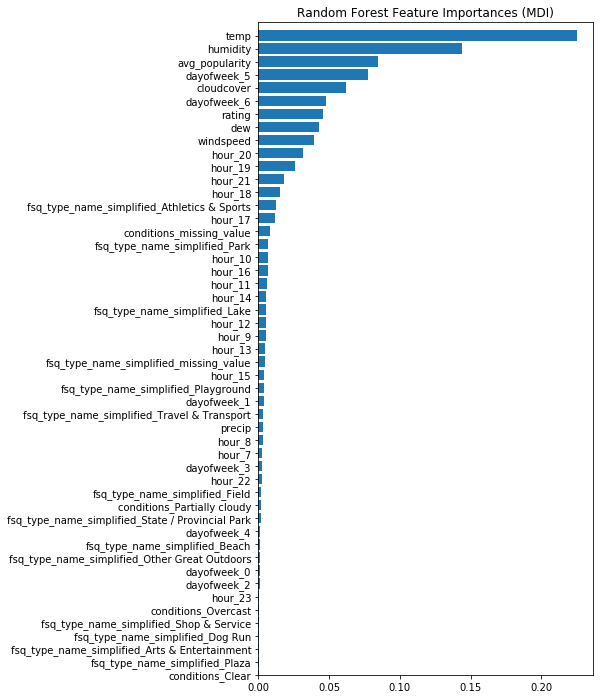

In [141]:
# get categorical feature names (since oneHotEncoder)
# Tree’s Feature Importance from Mean Decrease in Impurity (MDI)
ohe = (est.named_steps['feature'].named_transformers_['cat'].named_steps['onehot_encoder'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = (
    est.named_steps['estimator'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
plt.figure(figsize=[6,12])
# fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, labels=feature_names[sorted_idx])
plt.ylim([40, len(feature_names)])
plt.title("Random Forest Feature Importances (MDI)")


#### Or to use permutation importance on the hold out set
Note that for multicollinear features, the permutation importance will show that none of the features are important

See more https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

In [142]:
result = permutation_importance(est, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

Text(0.5, 1.0, 'Permutation Importances (test set)')

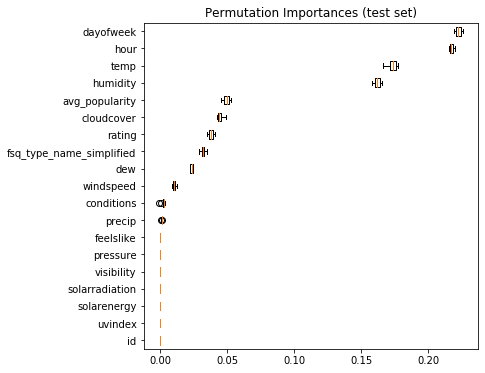

In [143]:
plt.figure(figsize=[6,6])
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importances (test set)")

In [196]:
import sklearn
sklearn.__version__

from sklearn import set_config
set_config(display='diagram')

est

Pipeline(steps=[('feature',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=None,
                                                                                 strategy='constant')),
                                                                  ('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hour', 'dayofweek',
                                                   'conditions',
                                                   'fsq_type_name_simplified']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   MaxAbsScaler())]),
                                                  ['avg_popularity', 'temp',
                                                   'humidity', 'dew', 'precip',
                                                   'windspeed', 'cloudcover',
                                                   'rating'])])),
                ('estimator',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=10,
                                       n_estimators=20))])

In [34]:
# from sklearn.utils import estimator_html_repr

# with open('model_v1_Date_2021-03-16_2021-04-10.html', 'w') as f:
#     f.write(estimator_html_repr(est))

#### Hyperparameters gridsearch

In [197]:
est.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'feature', 'estimator', 'feature__n_jobs', 'feature__remainder', 'feature__sparse_threshold', 'feature__transformer_weights', 'feature__transformers', 'feature__verbose', 'feature__cat', 'feature__num', 'feature__cat__memory', 'feature__cat__steps', 'feature__cat__verbose', 'feature__cat__imputer', 'feature__cat__onehot_encoder', 'feature__cat__imputer__add_indicator', 'feature__cat__imputer__copy', 'feature__cat__imputer__fill_value', 'feature__cat__imputer__missing_values', 'feature__cat__imputer__strategy', 'feature__cat__imputer__verbose', 'feature__cat__onehot_encoder__categories', 'feature__cat__onehot_encoder__drop', 'feature__cat__onehot_encoder__dtype', 'feature__cat__onehot_encoder__handle_unknown', 'feature__cat__onehot_encoder__sparse', 'feature__num__memory', 'feature__num__steps', 'feature__num__verbose', 'feature__num__imputer', 'feature__num__scaling', 'feature__num__imputer__add_indicator', 'feature__num__imputer__copy', 'featur

In [198]:
from sklearn.utils import shuffle

df_popularity_X_shuffle, df_popularity_y_shuffle = shuffle(df_popularity_X, df_popularity_y, random_state=42)

In [199]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'estimator__max_depth': [10, 15, 20, 25, 30],
             'estimator__min_samples_leaf': [5, 10, 15, 20], 
             'estimator__n_estimators': [10, 20, 30], 
             'estimator__min_samples_split': [5, 10, 15]}

clf = RandomizedSearchCV(est, parameters, n_iter=35, cv=5, verbose=5)
clf.fit(df_popularity_X_shuffle, df_popularity_y_shuffle)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=10, score=0.352, total= 2.7min
[CV] estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s


[CV]  estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=10, score=0.351, total= 2.7min
[CV] estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.5min remaining:    0.0s


[CV]  estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=10, score=0.356, total= 2.7min
[CV] estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=10 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  8.2min remaining:    0.0s


[CV]  estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=10, score=0.361, total= 2.7min
[CV] estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=10 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 10.9min remaining:    0.0s


[CV]  estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=10, score=0.358, total= 2.7min
[CV] estimator__n_estimators=20, estimator__min_samples_split=10, estimator__min_samples_leaf=15, estimator__max_depth=30 
[CV]  estimator__n_estimators=20, estimator__min_samples_split=10, estimator__min_samples_leaf=15, estimator__max_depth=30, score=0.408, total=13.8min
[CV] estimator__n_estimators=20, estimator__min_samples_split=10, estimator__min_samples_leaf=15, estimator__max_depth=30 
[CV]  estimator__n_estimators=20, estimator__min_samples_split=10, estimator__min_samples_leaf=15, estimator__max_depth=30, score=0.409, total=13.8min
[CV] estimator__n_estimators=20, estimator__min_samples_split=10, estimator__min_samples_leaf=15, estimator__max_depth=30 
[CV]  estimator__n_estimators=20, estimator__min_samples_split=10, estimator__min_samples_leaf=15, estimator__max_depth=30, score=0.408, total=13.8min
[CV] estimator__n_estimators=

[CV]  estimator__n_estimators=30, estimator__min_samples_split=10, estimator__min_samples_leaf=15, estimator__max_depth=15, score=0.402, total= 9.2min
[CV] estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=25 
[CV]  estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=25, score=0.403, total= 6.0min
[CV] estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=25 
[CV]  estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=25, score=0.404, total= 5.9min
[CV] estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=25 
[CV]  estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=25, score=0.404, total= 6.0min
[CV] estimator__n_estimators=10, 

[CV]  estimator__n_estimators=30, estimator__min_samples_split=15, estimator__min_samples_leaf=5, estimator__max_depth=10, score=0.352, total= 4.0min
[CV] estimator__n_estimators=30, estimator__min_samples_split=15, estimator__min_samples_leaf=5, estimator__max_depth=10 
[CV]  estimator__n_estimators=30, estimator__min_samples_split=15, estimator__min_samples_leaf=5, estimator__max_depth=10, score=0.352, total= 4.0min
[CV] estimator__n_estimators=30, estimator__min_samples_split=15, estimator__min_samples_leaf=5, estimator__max_depth=10 
[CV]  estimator__n_estimators=30, estimator__min_samples_split=15, estimator__min_samples_leaf=5, estimator__max_depth=10, score=0.354, total= 4.0min
[CV] estimator__n_estimators=30, estimator__min_samples_split=15, estimator__min_samples_leaf=5, estimator__max_depth=10 
[CV]  estimator__n_estimators=30, estimator__min_samples_split=15, estimator__min_samples_leaf=5, estimator__max_depth=10, score=0.361, total= 4.0min
[CV] estimator__n_estimators=30, e

[CV]  estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=15, score=0.399, total= 6.8min
[CV] estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=15 
[CV]  estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=15, score=0.398, total= 7.4min
[CV] estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=15 
[CV]  estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=15, score=0.398, total= 7.6min
[CV] estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=15 
[CV]  estimator__n_estimators=20, estimator__min_samples_split=5, estimator__min_samples_leaf=5, estimator__max_depth=15, score=0.402, total= 7.3min
[CV] estimator__n_estimators=20, estimato

[CV]  estimator__n_estimators=30, estimator__min_samples_split=10, estimator__min_samples_leaf=20, estimator__max_depth=20, score=0.408, total=14.3min
[CV] estimator__n_estimators=30, estimator__min_samples_split=10, estimator__min_samples_leaf=20, estimator__max_depth=20 
[CV]  estimator__n_estimators=30, estimator__min_samples_split=10, estimator__min_samples_leaf=20, estimator__max_depth=20, score=0.409, total=14.5min
[CV] estimator__n_estimators=30, estimator__min_samples_split=10, estimator__min_samples_leaf=20, estimator__max_depth=20 
[CV]  estimator__n_estimators=30, estimator__min_samples_split=10, estimator__min_samples_leaf=20, estimator__max_depth=20, score=0.411, total=14.4min
[CV] estimator__n_estimators=30, estimator__min_samples_split=10, estimator__min_samples_leaf=20, estimator__max_depth=20 
[CV]  estimator__n_estimators=30, estimator__min_samples_split=10, estimator__min_samples_leaf=20, estimator__max_depth=20, score=0.412, total=14.4min
[CV] estimator__n_estimator

[CV]  estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=10, score=0.355, total= 1.4min
[CV] estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=10 
[CV]  estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=10, score=0.355, total= 1.3min
[CV] estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=10 
[CV]  estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=10, score=0.356, total= 1.4min
[CV] estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=10 
[CV]  estimator__n_estimators=10, estimator__min_samples_split=5, estimator__min_samples_leaf=20, estimator__max_depth=10, score=0.356, total= 1.4min
[CV] estimator__n_estimators=20, e

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed: 1574.1min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('feature',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(missing_values=None,
                                                                                                              strategy='constant')),
                                                                                               ('onehot_encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['hour',
                                                                                'dayofweek',
                                                                                'conditions',
                                                                                'fsq_type_name_simplified']),
                                                                              ('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImput...
                                                                                'humidity',
                                                                                'dew',
                                                                                'precip',
                                                                                'windspeed',
                                                                                'cloudcover',
                                                                                'rating'])])),
                                             ('estimator',
                                              RandomForestRegressor(max_depth=20,
                                                                    min_samples_leaf=10,
                                                                    n_estimators=20))]),
                   n_iter=35,
                   param_distributions={'estimator__max_depth': [10, 15, 20, 25,
                                                                 30],
                                        'estimator__min_samples_leaf': [5, 10,
                                                                        15,
                                                                        20],
                                        'estimator__min_samples_split': [5, 10,
                                                                         15],
                                        'estimator__n_estimators': [10, 20,
                                                                    30]},
                   verbose=5)

In [200]:
# with open('rand_search_cv_clf_v1_Date_2021-03-16_2021-04-20.dill', 'wb') as f:
#      dill.dump(clf, f)
with open('rand_search_cv_clf_v2_Date_2021-03-16_2021-05-05.dill', 'wb') as f:
     dill.dump(clf, f)

In [203]:
clf.best_score_

0.4114579639700612

In [201]:
clf.best_params_

{'estimator__n_estimators': 30,
 'estimator__min_samples_split': 10,
 'estimator__min_samples_leaf': 20,
 'estimator__max_depth': 25}

### Visualize prediction by parks

In [204]:
def show_prediction_per_park(park_id, df_popularity, info_df, gs):
    # get the predictions
#     sub_df = pd.concat([df_hour, df_dayweek, df_popularity[['temp','humidity', 'precip', 'curr_popularity']]], axis=1)
#     test_X = sub_df[df_popularity['id']==test_id].drop(columns=['curr_popularity', ])
#     predict_y = gs.predict(test_X.fillna(0))
    predict_y = gs.predict(df_popularity_X[df_popularity_X['id']==park_id])
    
    # plot data df_y
    sub_df = df_popularity[df_popularity['id']==park_id]
    plt.figure(figsize=[15,3])

    plt.plot(sub_df['datetime_hour'], sub_df['curr_popularity'], 'o')
    plt.legend(info_df[info_df['id']==park_id]['name'])
    plt.plot(sub_df['datetime_hour'], predict_y, '^') #fill in 0 for missing values #, markersize=10

    plt.figure(figsize=[15,3])
    plt.plot(sub_df['datetime_hour'], df_popularity[df_popularity['id']==test_id]['dew'], 'o')
    plt.plot(sub_df['datetime_hour'], df_popularity[df_popularity['id']==park_id]['humidity'], '^')
    

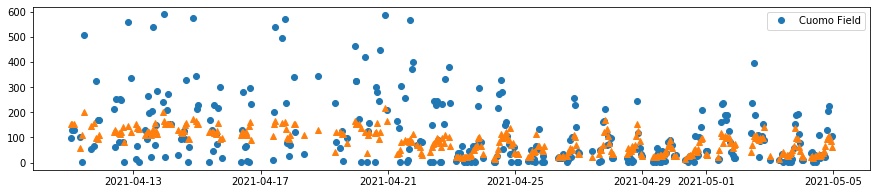

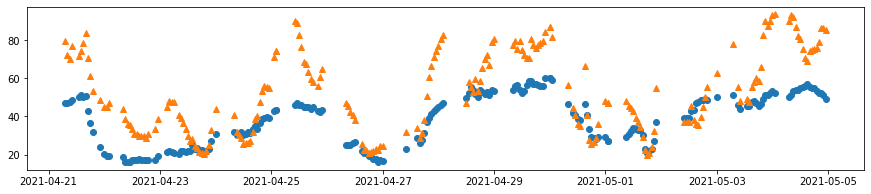

In [205]:
test_id = 'ChIJmzxyk71_wokRNat91DHrlpk'#'ChIJy2dLH7TMNIgRnKnsPaq4AeM'
show_prediction_per_park(test_id, df_popularity, info_df, clf)

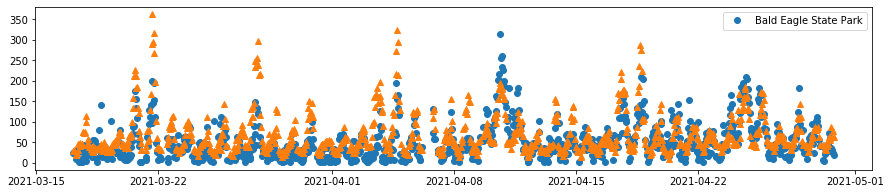

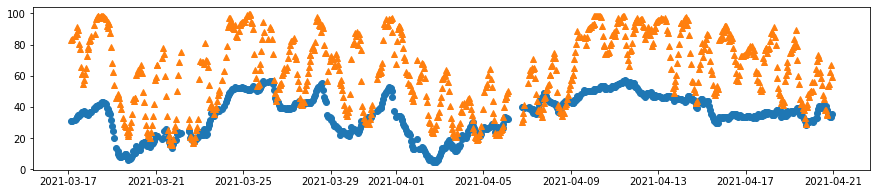

In [206]:
test_id = 'ChIJPUAh3FWRzokRTusj8NUp8dk'#'ChIJy2dLH7TMNIgRnKnsPaq4AeM' 
show_prediction_per_park(test_id, df_popularity, info_df, clf)

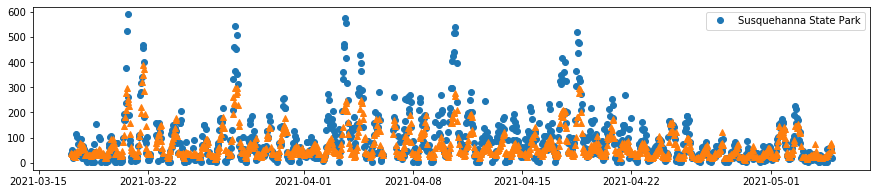

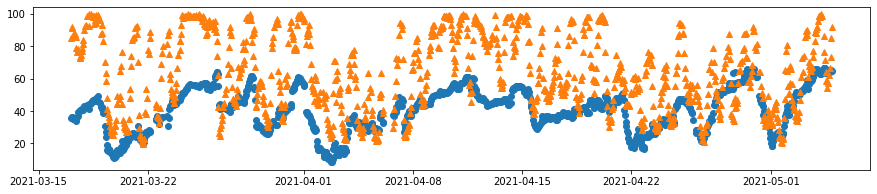

In [207]:
test_id = 'ChIJ2R92Tl7Gx4kRO6G7NcWtNhk' 
show_prediction_per_park(test_id, df_popularity, info_df, clf)

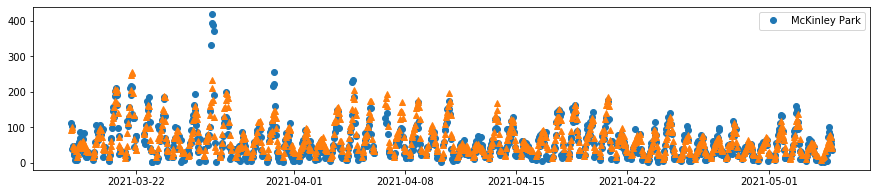

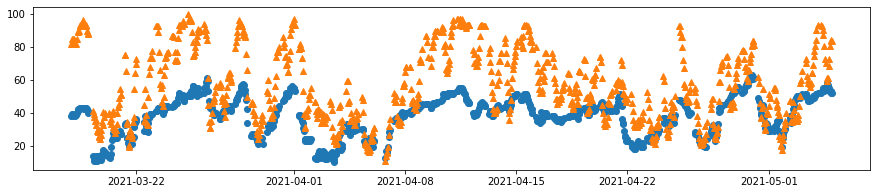

In [208]:
# some examples for 'Travel & Transport': #'ChIJreKNFonIxokRPfXi7jRKom0'#'ChIJU-taUeGcyIkRmOMiqeRIRks'
test_id = 'ChIJlT2okERFwokR616KLhTmZ8I' #playground
show_prediction_per_park(test_id, df_popularity, info_df, clf)

### Calibrate residuals between predicted and actual popularity
The idea is that if the model is able to account for contextual effects from time, weather, and type of park, the random effect from each park would represent whether it's under or over populated in general. Eccentially, the model would provide some baseline, and based on which we evaluate whether a particular park should be promoted more.

7.345661077725142

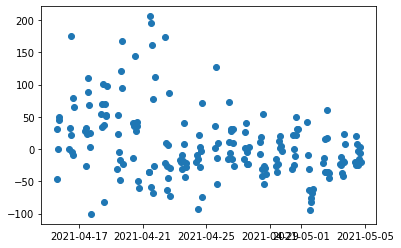

In [209]:
# calculate residuals normalized by # of data entry
park_id = 'ChIJHyWi0l39wokRoVFdfzLDUlE'#'ChIJy2dLH7TMNIgRnKnsPaq4AeM'#'ChIJ2R92Tl7Gx4kRO6G7NcWtNhk'

predict_y = clf.predict(df_popularity_X[df_popularity_X['id']==park_id])
y = df_popularity_y[df_popularity_X['id']==park_id]

plt.plot(df_popularity[df_popularity_X['id']==park_id]['datetime_hour'], y-predict_y, 'o');
np.nanmean(y-predict_y)

In [210]:
def predicted_popularity_residual(park_id):
    predict_y = clf.predict(df_popularity_X[df_popularity_X['id']==park_id])
    y = df_popularity_y[df_popularity_X['id']==park_id]
    return np.nanmean(y - predict_y)

In [211]:
unique_park_id = df_popularity_X['id'].unique()
pred_pop_residuals = {}

for park_id in unique_park_id:
    pred_pop_residuals[park_id] = predicted_popularity_residual(park_id)
    

Text(0, 0.5, 'Count of parks')

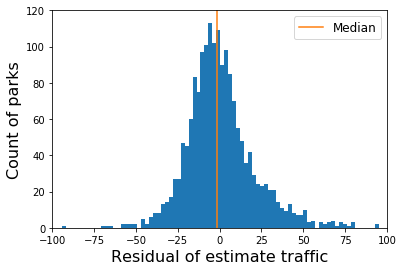

In [236]:
plt.hist(pred_pop_residuals.values(), 100);
pop_residuals_median = np.median(np.array(list(pred_pop_residuals.values())))
plt.plot([pop_residuals_median, pop_residuals_median], [0, 120], label='Median'); 
plt.ylim([0, 120]); plt.xlim([-100, 100])
plt.legend(fontsize=12)
plt.xlabel('Residual of estimate traffic', fontsize=16)
plt.ylabel('Count of parks', fontsize=16)

In [216]:
info_df_wt_fsq_type.set_index('id', inplace=True)

for k, v in pred_pop_residuals.items():
    info_df_wt_fsq_type.loc[k, 'pred_pop_residual'] = v

info_df_wt_fsq_type = info_df_wt_fsq_type.reset_index()
info_df_wt_fsq_type.head()

,id,name,rating,lat,lng,address,address_city,fsq_type_name_simplified,pred_pop_residual
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,4.7,38.937670,-76.500899,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD",Park,-10.157161
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,5.0,38.927212,-76.494150,"101 W Bay View Dr, Annapolis, MD 21403, USA","Annapolis,MD",Playground,NaN
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,4.7,38.930202,-76.508341,"1701-1799 Quiet Waters Park Rd, Annapolis, MD ...","Annapolis,MD",None,9.330558
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,4.8,38.931865,-76.505658,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","Annapolis,MD",Dog Run,NaN
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,4.5,38.963271,-76.505150,"273 Hilltop Ln, Annapolis, MD 21403, USA","Annapolis,MD",Athletics & Sports,-21.618591


In [217]:
info_df_wt_fsq_type.to_parquet('park_feature_with_predpop.parquet')


In [218]:
info_df_wt_fsq_type.shape

(4618, 9)